Que 1.

Daily energy intake in kJ was measured for 11 women (Altman, 1991):
5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770.
We wish to investigate whether the women’s energy intake deviates
systematically from a recommended value of 7725 kJ. Assuming this
data comes from a normal distribution; use a t-test to test whether the
distribution might have a mean of 7725 kJ. Explain whether a left-tail,
right-tail or two-tailed test is appropriate. Give the sample mean,
sample standard deviation, standard error of the mean (SEM), t statistic,
degrees of freedom and p-value. Finally explain if the null hypothesis is
rejected or not.

In [ ]:
import math
import numpy as np
from scipy import stats
import inspect


distr = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

alpha = 0.1
n = len(distr)
df = n - 1 #degree of freedom
mean = np.mean(distr)
std = np.std(distr)
mu = 7725
sem = std/math.sqrt(n)

# critcal value in table is 1.812 for df 10 and alpha 0.1 two-tailed test


ttest, pval = stats.ttest_1samp(distr, mu)

print "Sample mean:", mean #sample mean

print "Sample standard deviation", std

print "Standard error of the mean", sem

print "t-statistic", ttest

print "degree of freedom", df

print "p-value", pval


Answer:

Two-tailed tests are only applicable when there are two tails, such as in the normal distribution, and correspond to considering either direction significant
As in this case, we use two tailed because the deviation could be in either direction.


Sample mean: 6753.63636364
Sample standard deviation 1088.97176462
Standard error of the mean 32t cumulative density function8.337340957
t-statistics -2.82075406083
degree of freedom 10
p-value 0.0181372351761


The null hypothesis is accepted because the t-statistic is less than the critical value (3.169) in the table and the 
p-value is less than the alpha value.


Que 2.


A Guinness Overall Enjoyment Score (GOES) was used to test if
Guinness served in an Irish pub tastes significantly better than pints
served elsewhere around the globe. Pints consumed in Ireland received
a mean GOES score of 74, while the average GOES score for Guinness
tasted elsewhere was 57. The full results were as follows:
Location
             Sample Size    Mean   Standard Deviation
Ireland        42            74          7.4

Elsewhere      61            57          7.1


Is this difference of 74 versus 57 significant, or is it simply due to
natural, random variation? Use a t-test and explain whether a one-
sample, two-sample or paired test is appropriate. Show the steps of
calculating the t statistic and explain whether a left-tailed, right-tailed or
two-tailed test is required. Give the resulting p-value.

In [51]:
import math
from scipy import stats
from scipy.stats import distributions


x1 = 74
x2 = 57

s1 = 7.4
s2 = 7.1

n1 = 42
n2 = 61


num = x1 - x2
denom = math.sqrt(math.pow(s1, 2)/42 + math.pow(s2, 2)/61)

t = num/denom

num = math.pow((math.pow(s1, 2)/42 + math.pow(s2, 2)/61), 2)

denom = math.pow((math.pow(s1, 2)/42), 2)/(n1 - 1) + math.pow((math.pow(s2, 2)/61), 2)/(n2 - 1)

df = num/denom

pval = stats.t.sf(t, df)

pval

def _ttest_finish(df,t):
    prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
    return prob

pval2 = _ttest_finish(df, t)



Answer:

////////////////////////////////////////////////

Steps

num = x1 - x2
denom = math.sqrt(math.pow(s1, 2)/42 + math.pow(s2, 2)/61)

t = num/denom

where x1 and x2 are the means of the respective samples
s1 and s2 are the standard deviations
math.sqrt is the square root of the singular argument
math.pow is the exponentiation of the first argument to the power of the second argument

t is the t-statistic


////////////////////////////////////////////////

t-statistic: 11.647653131319812
    
df: 85.87168862441837

We calculate a paired t-test which simply performs a 1-sample t-test on the paired differences of the observations.

We employ a two tailed test as we need to know the significance on both sides of deviation from the means.


p-value: 2.3158901628742272e-19 which is approx. 0

Que 3.

Use data from the World Bank Indicators for 2013 to study the
relationship between Fertility rate, total (births per woman) versus GDP
per capita PPP (current international $). Make a carefully labelled
graph with one dot per country. Estimate the correlation coefficient and
give your interpretation.

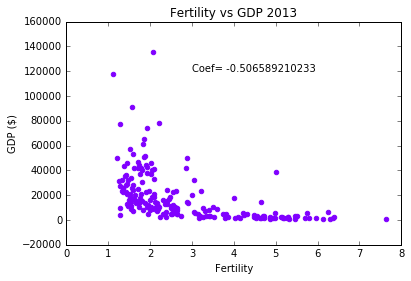

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

df = pd.read_csv('fertility_gdp.csv')
color = iter(cm.rainbow(np.linspace(0, 1, len(df))))
plt.scatter(df.fertility, df.gdpppp, color=next(color))
plt.title("Fertility vs GDP 2013")
plt.xlabel("Fertility")
plt.ylabel("GDP ($)")

df = df.dropna()


coef = np.corrcoef(df.fertility, df.gdpppp)[0, 1]

plt.text(3, 120000, "Coef= "+ str(coef))
plt.show()

Answer:

There is a moderate negative correlation between fertility and GDP. This could mean that as countries become rich the child mortality rate reduces because there are more efficient health institutions. In other words a woman in a richer country would give birth to less children in her lifetime because a much higher proportion of those children would live. Where as in a poor country a woman is less assured that all her children would live, and may also deicide to produce more when a child dies.

Que. 4

Load in monthly average house price data in pounds sterling (£) from
Jan 1991 to Aug 2015. Download the data from
http://www.nationwide.co.uk/about/house-price-index/download-data#xtab:uk-series (choose the file UK monthly indices (Post ‘91)).
Graph the time series and label it carefully. Construct the
autocorrelation function (ACF) of the monthly returns defined as r(t) =
[p(t)/p(t-1)]-1 and show the values for lags of one up to 20 using a bar-
graph. Indicate the values of the ACF using horizontal lines that would
correspond to a statistically significant result at p<0.05. From the ACF
of monthly data is there evidence of seasonality? Is there a trend in the
time series? What is the annualized return over this period as a
percentage?

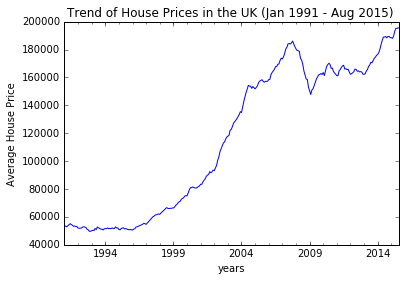

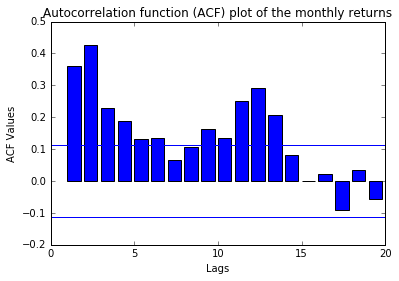

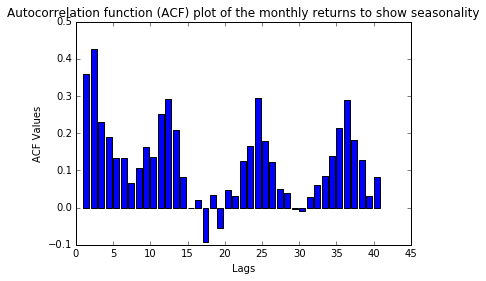

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
import statsmodels.tsa.stattools as acf
from __future__ import division 

%matplotlib inline


data = pd.read_excel('monthly.xls')
toplot = data['Average House Price']
toplot.plot()

plt.title('Trend of House Prices in the UK (Jan 1991 - Aug 2015) ')
plt.xlabel('years')
plt.ylabel('Average House Price')
plt.show()

returns = (toplot/toplot.shift(1)) -1 
returns = returns[1 :]

acf = acf.acf(returns)


left = range(1, 20)
height = acf[1 : 20]

sizeofacf = len(acf)
sizeofreturns = len(returns)

annreturns = (returns - returns.shift(12)) / returns.shift(12)

size = len(annreturns)

cumsum = 0
ct = 0
for i in range(12, size, 12):

    cumsum = cumsum + annreturns[i]
    ct += 1
    
    
avg = (cumsum/ct) * 100

plt.bar(left, height)
plt.title("Autocorrelation function (ACF) plot of the monthly returns")
plt.ylabel("ACF Values")
plt.xlabel("Lags")


positiveacf = 1.96/math.sqrt(size)
negativeacf = (-1 * 1.96)/math.sqrt(size)


plt.axhline(positiveacf)
plt.axhline(negativeacf)            

plt.show()
sz = len(acf)
left = range(1, sz)
height = acf[1 : sz]

plt.bar(left, height)
plt.title("Autocorrelation function (ACF) plot of the monthly returns to show seasonality")
plt.ylabel("ACF Values")
plt.xlabel("Lags")

plt.show()


sz = len(toplot)

# toplot = toplot[0 :int(sz/12) * 12 +1]
# sz = len(toplot)
avgannreturns = (pow(toplot[len(toplot) - 1], (12/sz)) - pow(toplot[0], (12/sz))) /  pow(toplot[0], (12/sz))

asPercent = str(avgannreturns * 100)

# print "The annualized return over this period as a percentage is " + str(avgannreturns * 100)


Answer:

The annualized return over this period as a percentage is 5.42513599178%

Yes. There is a clear upward trend in the prices of houses as shown from the time series plot.

And as can be seen on the ACF plot over 40 lags, there is an indication of seasonality in the prices of houses.



Que 5.

Load in the FTSE100 index from Yahoo Finance (ticker = ^FTSE) over
the same period (01-Jan-1991 to 31-Aug-2015). Plot the cumulative
returns from the House market (using the price data from question 4)
and the FTSE100 index on the same graph with the time series
normalized such that each starts at 100 in Jan-1991. What is the
average annualized return from the FTSE100. Would it have been
better to invest in a UK house or the UK stock market over this period?

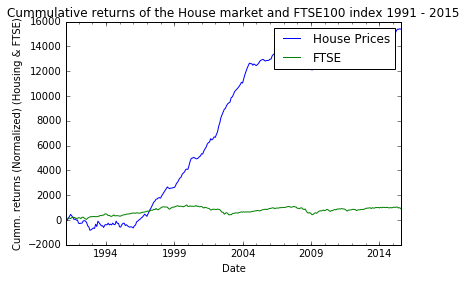

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division

%matplotlib inline

ftse = pd.read_csv('FTSE100.csv', index_col = 0)['Adj Close']

data = pd.read_excel('monthly.xls')
hp = data['Average House Price']

sz = len(ftse)

ftse = ftse.iloc[::-1]

cumr_hp = ((hp - hp.shift(1))/ hp).cumsum()
cumr_ftse = ((ftse - ftse.shift(1))/ftse).cumsum()

cumr_hp = (cumr_hp/cumr_hp[1]) * 100
cumr_ftse = (cumr_ftse/cumr_ftse[1]) * 100

cumr_hp = cumr_hp[1 :]
cumr_ftse = cumr_ftse[1 :]

cumr_hp.plot(label='House Prices')
cumr_ftse.plot(label='FTSE')
plt.title("Cummulative returns of the House market and FTSE100 index 1991 - 2015")
plt.ylabel("Cumm. returns (Normalized) (Housing & FTSE)")

plt.legend()
plt.show()

ftse = ftse[0 :int(sz/12) * 12 +1]

avgannreturns = (pow(ftse[len(ftse) - 1], (12/sz)) - pow(ftse[0], (12/sz))) /  pow(ftse[0], (12/sz))

# print (avgannreturns)


Answer:

Average Annualized returns from FTSE: 4.70710787796

Obviously from the graph its more profitable to invest in houses over the financial times stock exchange for this period.